In [1]:
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pET = pd.read_pickle('results/pET_complete.pkl.gz')
eSOL = pd.read_pickle('results/ecoli.pkl.gz')

In [3]:
pET_insol = pET.loc[pET['Solubility'] == 0]
pET_sol = pET.loc[pET['Solubility'] == 1]

In [5]:
pET_insol.shape, pET_sol.shape, eSOL.shape


((3978, 19), (8238, 19), (3198, 19))

In [7]:
d1 = Counter(pET_sol['Protein'].str.cat())
pET_sol_count = pd.DataFrame.from_dict(d1, orient='index')


d2 = Counter(pET_insol['Protein'].str.cat())
pET_insol_count = pd.DataFrame.from_dict(d2, orient='index')


d3 = Counter(eSOL['Sequence'].str.cat())
eSOL_count = pd.DataFrame.from_dict(d3, orient='index')



#normalise
pET_sol_count[0] = pET_sol_count[0]/pET_sol_count[0].sum()
pET_insol_count[0] = pET_insol_count[0]/pET_insol_count[0].sum()
eSOL_count[0] = eSOL_count[0]/eSOL_count[0].sum()

sol_dic_log = {}
insol_dic_log = {}

    
for k, v in enumerate(pET_sol_count.index):
    sol_dic_log[v] = np.log2(pET_sol_count.loc[v]/eSOL_count.loc[v])
    
    
for k, v in enumerate(pET_insol_count.index):
    insol_dic_log[v] = np.log2(pET_insol_count.loc[v]/eSOL_count.loc[v])

insol_dic_log_df = pd.DataFrame.from_dict(insol_dic_log, orient='index').sort_values(0)
insol_dic_log_df = insol_dic_log_df.rename(columns={0:'Insoluble'})

sol_dic_log_df = pd.DataFrame.from_dict(sol_dic_log, orient='index').sort_values(0)
sol_dic_log_df = sol_dic_log_df.rename(columns={0:'Soluble'})

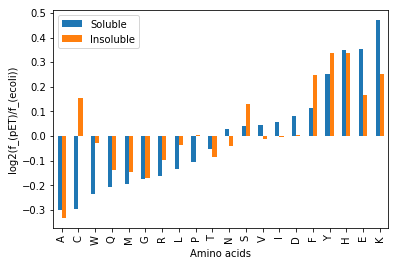

In [9]:
ax1 = pd.merge(sol_dic_log_df.reset_index(), insol_dic_log_df.reset_index(), on="index").plot.bar()
ax1.set_xticklabels(sol_dic_log_df.reset_index()['index'])
ax1.set(ylabel='log2(f_(pET)/f_(ecoli))', xlabel='Amino acids')
ax1.get_figure().savefig('figs/Aa_comparsion_ecoli_pET_log.pdf')

## Correlation between frequency of AA and weights

In [10]:
#AA count in all pET sequences

d0 = Counter(pET['Protein'].str.cat())
pET_count = pd.DataFrame.from_dict(d0, orient='index')

pET_count[0] = pET_count[0]/pET_count[0].sum()
pET_count

flexibilities_smith = {'A': 0.717, 'C': 0.668, 'E': 0.963, 'D': 0.921,\
                         'G': 0.843, 'F': 0.599, 'I': 0.632, 'H': 0.754, \
                         'K': 0.912, 'M': 0.685, 'L': 0.681, 'N': 0.851,\
                         'Q': 0.849, 'P': 0.85, 'S': 0.84, 'R': 0.814, 'T': 0.758, \
                         'W': 0.626, 'V': 0.619, 'Y': 0.615}

freq_ = []
for i, v in flexibilities_smith.items():
    freq_.append(pET_count.loc[i, 0])
freq_

[0.076148717473501,
 0.012989538850126933,
 0.07023778870169442,
 0.056602142629268146,
 0.06812512064147752,
 0.03767127427068449,
 0.05529893996660314,
 0.051231101638453194,
 0.05626297296495454,
 0.025246529829166173,
 0.09516859039842179,
 0.03802985645358192,
 0.03834009047698756,
 0.042873096703278185,
 0.058956917760879524,
 0.05630655956328426,
 0.05083369441838812,
 0.011847130445165678,
 0.06581503093000249,
 0.032014905884080895]

In [11]:
##Correlation between weights and frequencey of AA

from scipy.stats import spearmanr

spearmanr([0.83613724, 0.52050857, 0.98795637, 0.90776747, 0.79960031,
       0.58431386, 0.67843693, 0.89580359, 0.92686797, 0.6323512 ,
       0.65434161, 0.85931181, 0.78985973, 0.82143627, 0.74345961,
       0.77080031, 0.80957536, 0.6383807 , 0.73553137, 0.61113598], \
          freq_)

SpearmanrResult(correlation=0.4917293233082706, pvalue=0.027658227513046127)

### The correlation between our weights and frequency of amino acids is statistically insignificant.